In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
df = pd.read_excel(r"C:\Users\pagal\OneDrive\Desktop\extra\Dataset-iTech - backup.xlsx")

In [3]:
df

,Links,Cluster,Details
0,https://www.youtube.com/watch?v=4-O14gOdRso,DeepLearning,hey everybody my name is greg and welcome to...
1,https://www.youtube.com/watch?v=6M5VXKLf4D4,DeepLearning,ever wondered how google translates an entir...
2,https://www.youtube.com/watch?v=lhufOy2W3Ps,DeepLearning,ever wondered how google translates an entir...
3,https://www.youtube.com/watch?v=d2kxUVwWWwU,DeepLearning,[Music] so let me share my screen and uh her...
4,https://www.youtube.com/watch?v=tPYj3fFJGjk,DeepLearning,"Hello, everybody, and welcome to an absolute..."
...,...,...,...
788,https://youtu.be/MusfMph9xEQ,Accounting,in this video we're gonna talk about Treasur...
789,https://youtu.be/59qyW1RxKIE,Accounting,when a company is doing really really well y...
790,https://youtu.be/vfj5lP5LxnI,Accounting,in this video we're going to talk about how ...
791,https://youtu.be/vfj5lP5LxnI,Accounting,in this video we're going to talk about how ...


In [4]:
df.dropna(inplace = True)

In [5]:
df

,Links,Cluster,Details
0,https://www.youtube.com/watch?v=4-O14gOdRso,DeepLearning,hey everybody my name is greg and welcome to...
1,https://www.youtube.com/watch?v=6M5VXKLf4D4,DeepLearning,ever wondered how google translates an entir...
2,https://www.youtube.com/watch?v=lhufOy2W3Ps,DeepLearning,ever wondered how google translates an entir...
3,https://www.youtube.com/watch?v=d2kxUVwWWwU,DeepLearning,[Music] so let me share my screen and uh her...
4,https://www.youtube.com/watch?v=tPYj3fFJGjk,DeepLearning,"Hello, everybody, and welcome to an absolute..."
...,...,...,...
788,https://youtu.be/MusfMph9xEQ,Accounting,in this video we're gonna talk about Treasur...
789,https://youtu.be/59qyW1RxKIE,Accounting,when a company is doing really really well y...
790,https://youtu.be/vfj5lP5LxnI,Accounting,in this video we're going to talk about how ...
791,https://youtu.be/vfj5lP5LxnI,Accounting,in this video we're going to talk about how ...


In [6]:
pd.DataFrame(df.Cluster.unique())

,0
0,DeepLearning
1,MachineLearning
2,WebDevelopment
3,Agriculture
4,Marketing
5,AppDevelopment
6,FashionTech
7,IOT
8,AR/VR
9,CloudComputing


In [7]:
df['category_id'] = df['Cluster'].factorize()[0]
category_id_df = df[['Cluster', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Cluster']].values)

# New dataframe
df

,Links,Cluster,Details,category_id
0,https://www.youtube.com/watch?v=4-O14gOdRso,DeepLearning,hey everybody my name is greg and welcome to...,0
1,https://www.youtube.com/watch?v=6M5VXKLf4D4,DeepLearning,ever wondered how google translates an entir...,0
2,https://www.youtube.com/watch?v=lhufOy2W3Ps,DeepLearning,ever wondered how google translates an entir...,0
3,https://www.youtube.com/watch?v=d2kxUVwWWwU,DeepLearning,[Music] so let me share my screen and uh her...,0
4,https://www.youtube.com/watch?v=tPYj3fFJGjk,DeepLearning,"Hello, everybody, and welcome to an absolute...",0
...,...,...,...,...
788,https://youtu.be/MusfMph9xEQ,Accounting,in this video we're gonna talk about Treasur...,29
789,https://youtu.be/59qyW1RxKIE,Accounting,when a company is doing really really well y...,29
790,https://youtu.be/vfj5lP5LxnI,Accounting,in this video we're going to talk about how ...,29
791,https://youtu.be/vfj5lP5LxnI,Accounting,in this video we're going to talk about how ...,29


In [8]:
df['Details'][0]

"  hey everybody my name is greg and welcome today we'll be making this model where it is a curious model that has two input streams the first is a feed forward or we'll call it stats stream and it takes these five numbers and feeds them through a conventional feed-forward neural network and get some four outputs or however many outputs then it takes a separate input stream a cnn or convolutional neural network picture stream it takes in a picture here's a pretty pokemon and so hence these attack and defense stats if you don't know what those mean it really doesn't matter and it takes in a picture and produces these standard convolutions so some sort of convolution max pooling and so on to get again in the end we get something like four outputs and then what this model does is concatenates them so it takes these four and these four and it just pretty much stacks them on top of each other so that then we can combine them together to get some final output if you don't understand that who

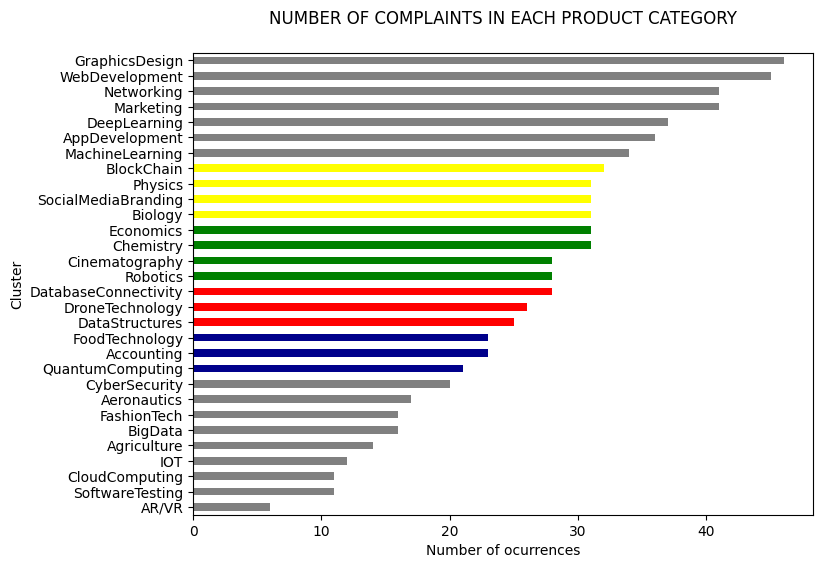

In [9]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue','red','red','red','green','green','green','green','yellow','yellow','yellow','yellow']
df.groupby('Cluster').Details.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [10]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df.Details).toarray()

labels = df.category_id

print("Each of the %d video details is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

features

Each of the 792 video details is represented by 22648 features (TF-IDF score of unigrams and bigrams)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03285256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.10747329, 0.05818529, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10747329, 0.05818529, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
X = df['Details']
y = df['Cluster'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [12]:
models = [
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=63),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [13]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.955760,0.026529
LogisticRegression,0.880018,0.032403
MultinomialNB,0.698201,0.028810
RandomForestClassifier,0.905278,0.032660


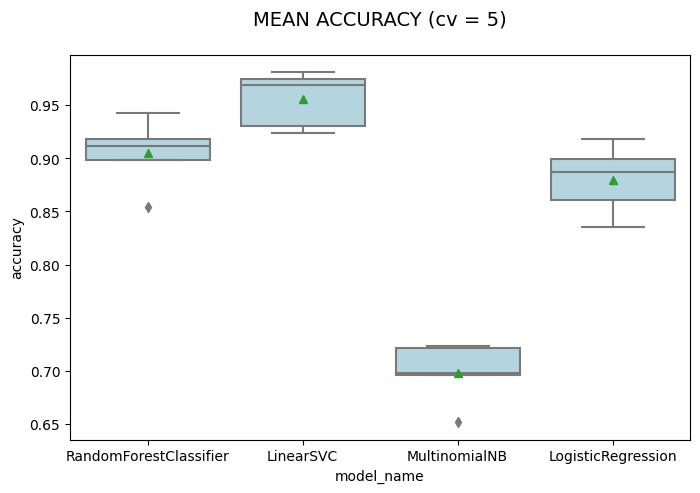

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [15]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.2, 
                                                               random_state=36)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(features)
y_test.unique()
y_train.unique()
model.score(X_train,y_train)
model.score(X_test,y_test)

0.9811320754716981

In [16]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(labels, y_pred, target_names= df['Cluster'].unique()))

				CLASSIFICATIION METRICS

                      precision    recall  f1-score   support

        DeepLearning       0.95      1.00      0.97        37
     MachineLearning       1.00      0.94      0.97        34
      WebDevelopment       1.00      1.00      1.00        45
         Agriculture       1.00      1.00      1.00        14
           Marketing       1.00      0.98      0.99        41
      AppDevelopment       1.00      1.00      1.00        36
         FashionTech       1.00      1.00      1.00        16
                 IOT       1.00      1.00      1.00        12
               AR/VR       1.00      1.00      1.00         6
      CloudComputing       1.00      1.00      1.00        11
       CyberSecurity       1.00      1.00      1.00        20
     SoftwareTesting       1.00      1.00      1.00        11
      DataStructures       1.00      1.00      1.00        25
 SocialMediaBranding       1.00      1.00      1.00        31
      FoodTechnology       1.00      1.0

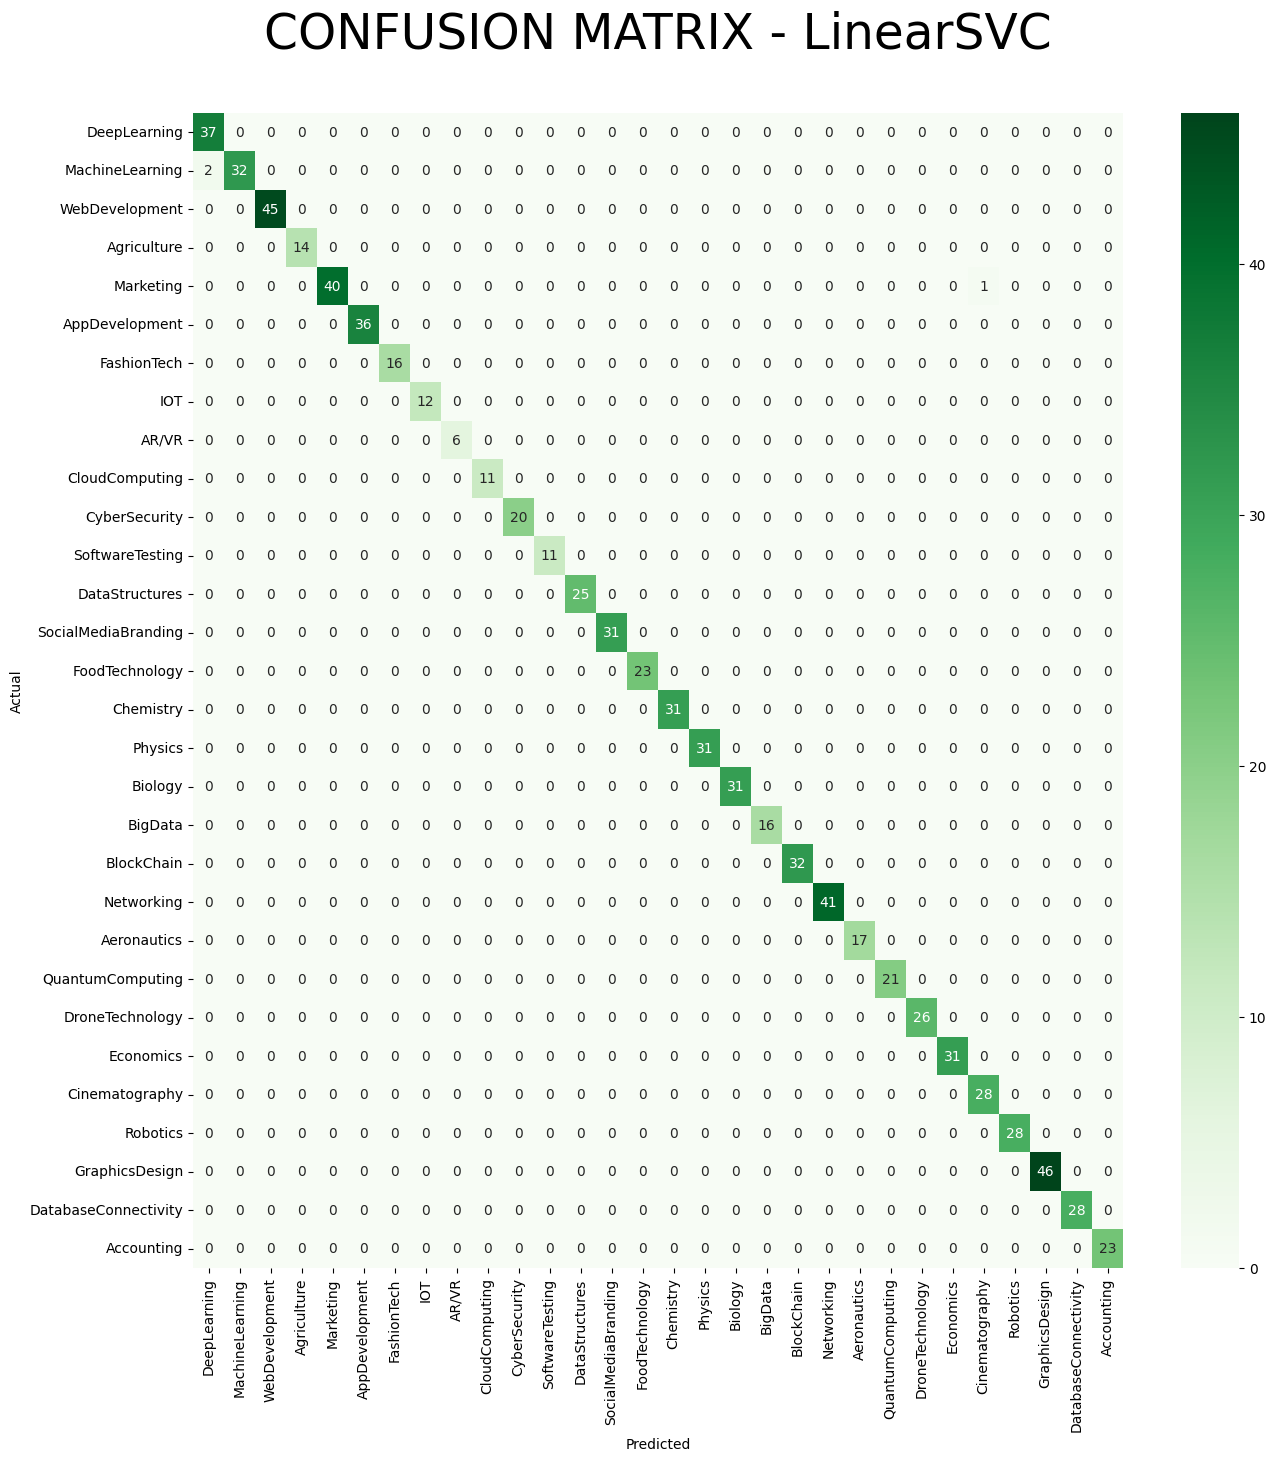

In [17]:
conf_mat = confusion_matrix(labels, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, cmap="Greens", fmt='d',
            xticklabels=category_id_df.Cluster.values, 
            yticklabels=category_id_df.Cluster.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=35);